# $\color{Aqua}{\textit{Histograms}}$

* [Stat Quest](https://youtu.be/qBigTkBLU6g) 

### $\color{Magenta}{\textit{Variants of Histogram}}$

[Example](https://docs.google.com/spreadsheets/d/1IJTzV0NDP6RHz2bs12LgWMcX17N1pjbh/edit?usp=sharing&ouid=104950950266360966380&rtpof=true&sd=true)

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn import datasets
# plotting styles
mpl.style.use("ggplot")

In [104]:
# IRIS Data Set
iris = datasets.load_iris()
df = pd.DataFrame(data=np.c_[iris.data, iris.target], columns=iris.feature_names+['Target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## Visualization of Data 

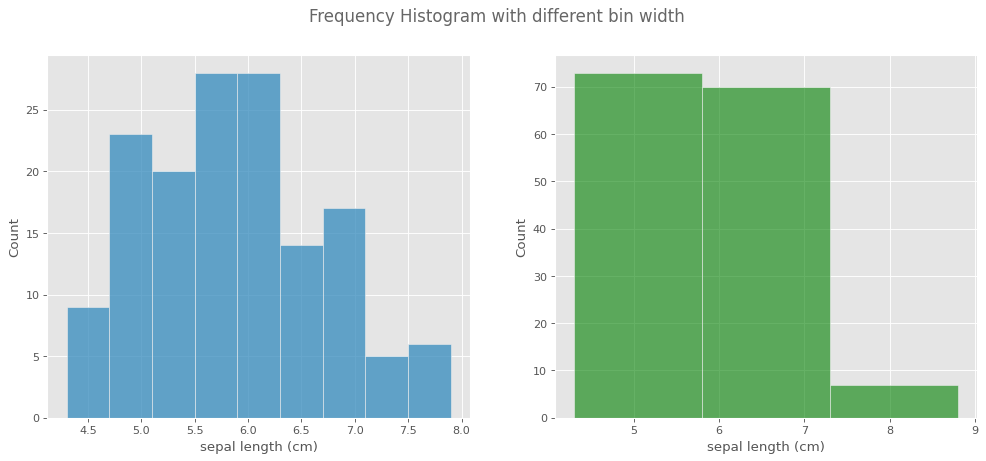

In [105]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6), dpi=80)
axes = axes.flatten()

# Bin width : Automatic 
sns.histplot(data=df, x="sepal length (cm)",ax=axes[0])

# Bin Width  = 1.5
sns.histplot(data=df, x="sepal length (cm)", ax=axes[1], binwidth=1.5, color="green", alpha=0.6)

plt.suptitle("Frequency Histogram with different bin width", alpha=0.6, fontsize=15)
plt.show()

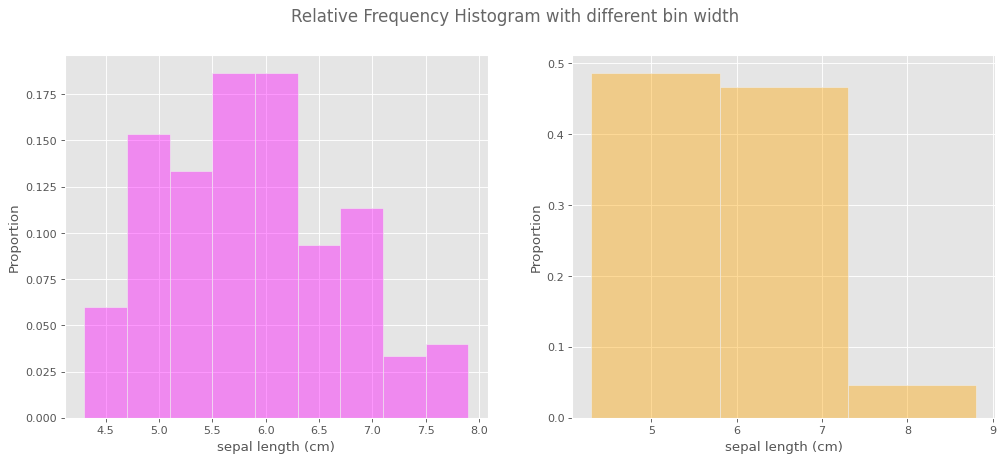

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6), dpi=80)
axes = axes.flatten()

# Bin width : Automatic 
sns.histplot(data=df, x="sepal length (cm)",ax=axes[0], stat="proportion", color="magenta", alpha=0.4)

# Bin Width  = 1.5
sns.histplot(data=df, x="sepal length (cm)", ax=axes[1], binwidth=1.5, color="orange", alpha=0.4, stat="proportion")
plt.suptitle("Relative Frequency Histogram with different bin width", alpha=0.6, fontsize=15)
plt.show()

#### Density?

For Particular bin, $$density = \frac{no.\ of\ observartions \ in \ the\  bin}{Bin\ Width}$$
  
  

Relative density i.e. probability density

$$probability\ density = \frac{\frac{no.\ of\ observartions \ in \ the\  bin}{Bin\ Width}}{Total\ Number\ of\ Observations}$$

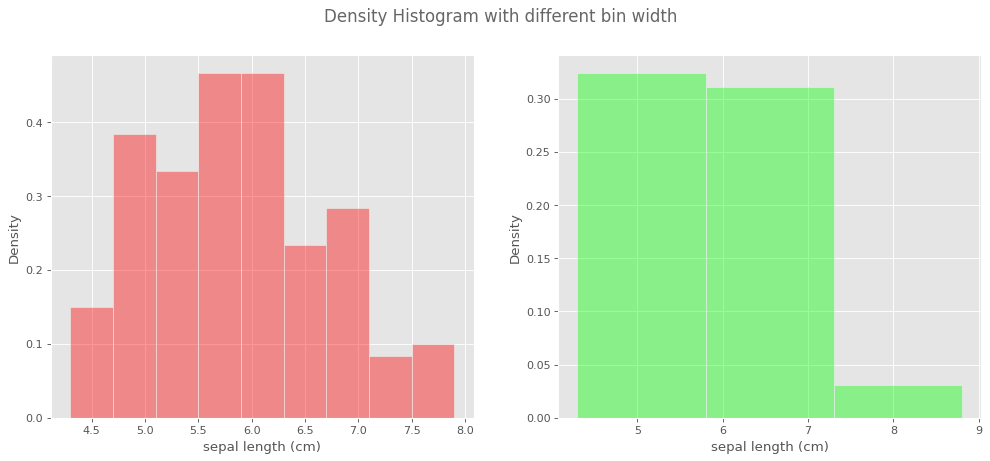

In [107]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6), dpi=80)
axes = axes.flatten()

# Bin width : Automatic 
g1 = sns.histplot(data=df, x="sepal length (cm)",ax=axes[0], stat="density", color="red", alpha=0.4)

# Bin Width  = 1.5
g2 = sns.histplot(data=df, x="sepal length (cm)", ax=axes[1], binwidth=1.5, color="Lime", alpha=0.4, stat="density")
plt.suptitle("Density Histogram with different bin width", alpha=0.6, fontsize=15)
plt.show()

# $\color{Aqua}{\textit{Probability Mass Function (P.M.F.)}}$

## Coin Toss Simulation

In [203]:
# Random Number Generators
rng  = np.random.RandomState(0)

In [204]:
#if Head then assign 1 else 0

# let's toss the three coins for 100000 times and see its pmf

no_of_heads = []

for i in range(100000):
    # 3 coin toss output
    three_coins_out = []
    for j in range(3):
        three_coins_out.append(rng.choice([0,1], p=[0.5, 0.5]))
    
    no_of_heads.append(sum(three_coins_out))


# DataFrame
df = pd.DataFrame({"ith Toss":range(1,100001),
                   "No: of Heads":no_of_heads})

In [205]:
df

,ith Toss,No: of Heads
0,1,3
1,2,2
2,3,2
3,4,2
4,5,2
...,...,...
99995,99996,1
99996,99997,0
99997,99998,0
99998,99999,0


In [206]:
df_1 = pd.DataFrame(df["No: of Heads"].value_counts().sort_index()).reset_index()
df_1  = df_1.rename(columns ={"index":"No: of Heads", "No: of Heads":"Counts"})
df_1["proportion"] = df_1["Counts"]/sum(df_1["Counts"])
df_1

,No: of Heads,Counts,proportion
0,0,12549,0.12549
1,1,37371,0.37371
2,2,37424,0.37424
3,3,12656,0.12656


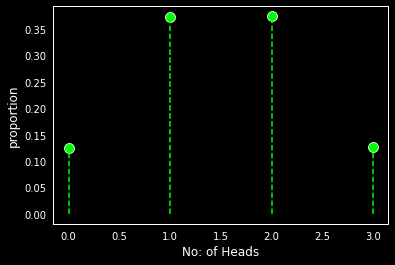

In [207]:
plt.style.use(['dark_background'])
g = sns.scatterplot(data=df_1, x="No: of Heads",y="proportion", color="lime", s = 100)
yposition = df_1["proportion"]
plt.vlines(x=[0,1,2,3], ymin=0, ymax=yposition, colors='lime', ls='--')
plt.show()